In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
warnings.filterwarnings('ignore')
import random
from collections import Counter
import math

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h3>Network Analysis:</h3>

- Degree distribution analysis; 
- Connected components analysis;
- Path analysis; 
- Clustering Coefficient, Density analysis; 
- Centrality analysis

- Comparison with ER and BA graphs


In [2]:
# Importo graph
G = nx.read_graphml("grafo_thr2.graphml")

In [ ]:
# Check labels
labels = nx.get_node_attributes(G,'etichetta')
labels

NUMBER OF NODES AND EDGES

In [3]:
G.number_of_nodes()

16828

In [ ]:
G.nodes() # Check that the nodes' names are the names of the ETS

In [5]:
G.number_of_edges()

992029

In [6]:
# Check if every node has the attribute "etichetta" (label)
tutti_hanno_label = all('etichetta' in G.nodes[nodo] for nodo in G.nodes())

if tutti_hanno_label:
    print("Tutti i nodi hanno un'etichetta.")
else:
    print("Alcuni nodi non hanno un'etichetta.")

Tutti i nodi hanno un'etichetta.


AVG NODE DEGREE

In [9]:
avg_node_degree = sum(dict(G.degree()).values())/float(len(G))

print("Avg node degree G: ", avg_node_degree)

Avg node degree G:  117.90218683147135


In [10]:
# Creation of a subgraph with the GC, excluding all others small components - avg node degree nel GC
comp_0 = max(nx.connected_components(G), key=len)
G_comp_0 = G.subgraph(comp_0).copy()  

avg_node_degree_GC = sum(dict(G_comp_0.degree()).values())/float(len(G_comp_0))

print("Avg node degree GC: ", avg_node_degree_GC)

Avg node degree GC:  156.96405992898588


DEGREE DISTRIBUTION

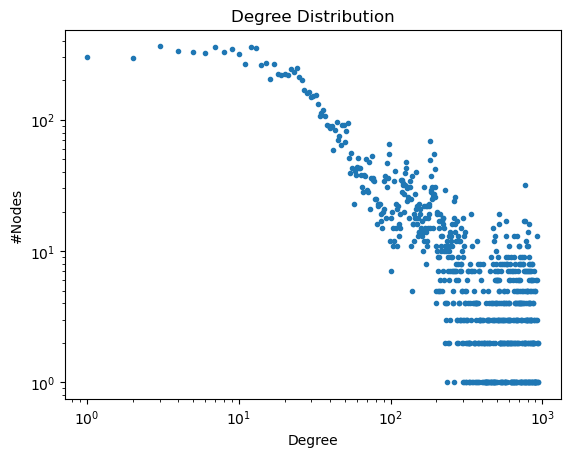

In [ ]:
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

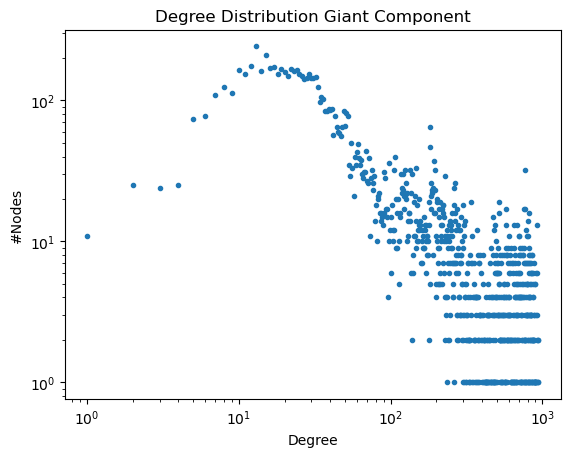

In [30]:
# Degree distribution within the GC
hist = nx.degree_histogram(G_comp_0)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Giant Component")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

NUMBER OF CONNECTED COMPONENTS

In [12]:
nx.is_connected(G) # Graph G is not connected

False

In [13]:
nx.number_connected_components(G)
# Result: 613

613

In [14]:
# Print the size of the components in decreasing order
components = [len(c) for c in nx.connected_components(G)]
components_sorted = sorted(components, reverse=True)
print(components_sorted)

[11547, 296, 267, 263, 193, 151, 150, 142, 111, 110, 90, 89, 63, 60, 48, 47, 47, 46, 42, 41, 41, 38, 36, 35, 33, 33, 32, 32, 31, 27, 26, 25, 25, 24, 23, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 20, 19, 19, 18, 18, 18, 18, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

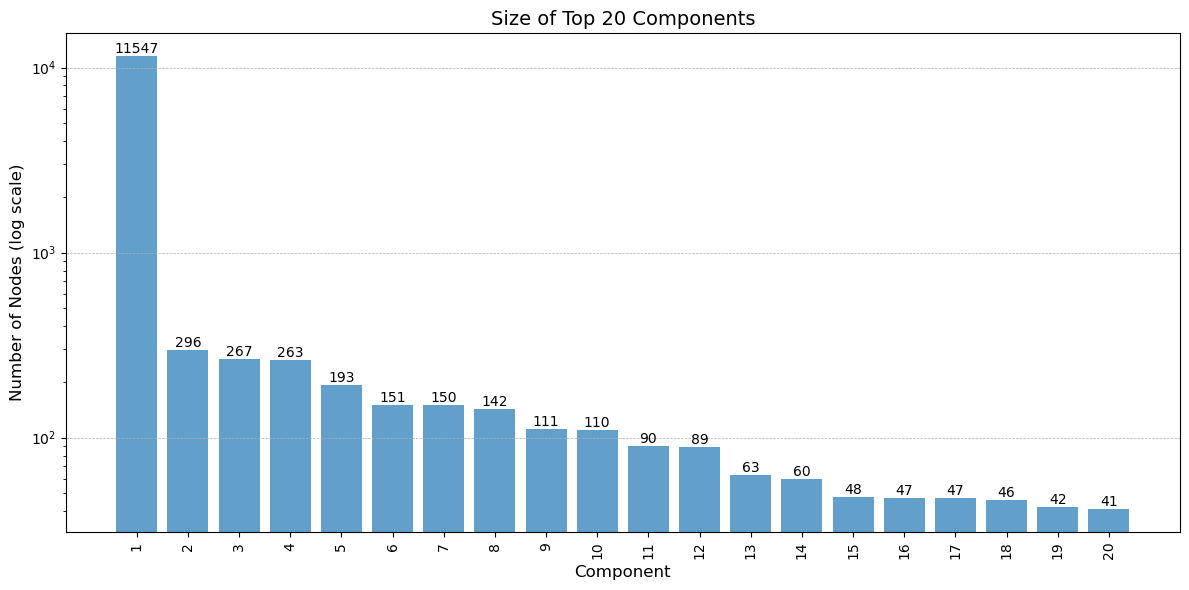

In [ ]:
# Get the connected components in decreasing order
comps = list(nx.connected_components(G))
sorted_comps = sorted(comps, key=len, reverse=True)

# Get the top 20 biggest components
top_20_comps = sorted_comps[:20]

# Get the size of the top 20 components
BarList = [len(comp) for comp in top_20_comps]

# Labels of the top 20 components
BarNames = [f"{i+1}" for i in range(len(BarList))]

# Graph
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title("Size of Top 20 Components", fontsize=14)
plt.xlabel("Component", fontsize=12)
plt.ylabel("Number of Nodes (log scale)", fontsize=12)
bars = plt.bar(BarNames, BarList, alpha=0.7)
plt.yscale("log")  # Logarithmic scale
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Add node count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f"{int(height)}", 
        ha="center", 
        va="bottom", 
        fontsize=10, 
    )
plt.show()

In [ ]:
# Count components with only 1 node and only 2 nodes
count_1_node = len([comp for comp in sorted_comps if len(comp) == 1])
count_2_nodes = len([comp for comp in sorted_comps if len(comp) == 2])

print(f"Number of components with 1 node: {count_1_node}")
print(f"Number of components with 2 nodes: {count_2_nodes}")

Number of components with 1 node: 173
Number of components with 2 nodes: 115


In [36]:
# Count components with 5 or less nodes
count_5_node = len([comp for comp in sorted_comps if len(comp) <= 5])

print(f"Number of components with 5 or less nodes: {count_5_node}")

Number of components with 5 or less nodes: 432


In [17]:
# Size (#nodes) of the biggest component
len(comps[0]) 

11547

DENSITY & AVERAGE CLUSTERING COEFFICIENT 

In [41]:
nx.density(G)
# Result: 0.007

0.007006726500949151

In [42]:
nx.density(G_comp_0)


0.013594670009439275

In [19]:
nx.average_clustering(G)
# Result: 0.762

0.7620504180811919

In [22]:
# Global clustering coefficient - comparing with the avg clustering coeff
triangoli = nx.triangles(G)
N_triangoli = sum(triangoli.values())  

triplette = {n: (G.degree(n) * (G.degree(n) - 1)) / 2 for n in G.nodes()}
N_triplette = sum(triplette.values()) 

global_clustering = N_triangoli / N_triplette if N_triplette != 0 else 0

print(f"Global Clustering Coefficient: {global_clustering}")

# Result: 0.674

Global Clustering Coefficient: 0.6741379922366026


CENTRALITIES

In [23]:
N_nodes = G.number_of_nodes()

Degree Centrality

In [24]:
# The nx function outputs a dictionary with the degree centrality of the graph nodes
dictDC = nx.degree_centrality(G)

In [25]:
# Calculate the mean of the centralities
sum = 0
for nodes in dictDC:
    sum = sum + dictDC[nodes]
Average_degree_centrality = sum/N_nodes
print(Average_degree_centrality)

# Result: 0.007

0.0070067265009489815


In [ ]:
# Average Degree Centrality of the Giant Component (GC)

# Get the GC (comp_0)
comp_0 = max(nx.connected_components(G), key=len)
G_comp_0 = G.subgraph(comp_0).copy()  
N_nodes_GC = G_comp_0.number_of_nodes()

# Calculate degree centralities of the nodes of the GC
dictDC_GC = nx.degree_centrality(G_comp_0)

# Calculate the average
sum = 0
for nodes in dictDC_GC:
    sum = sum + dictDC_GC[nodes]
avg_degree_centrality_GC = sum/N_nodes_GC

print(f"Degree Centrality Media del Giant Component: {avg_degree_centrality_GC:.4f}")

# Result: 0.0136

Degree Centrality Media del Giant Component: 0.0136


In [ ]:
# Print top 20 nodes with highest degree centrality

# Sort the nodes in decreasing order
top_20_nodes = sorted(dictDC.items(), key=lambda x: x[1], reverse=True)[:20]

# Print results
for node, centrality in top_20_nodes:
    print(f"Nodo: {node}, Degree Centrality: {centrality:.4f}")

Nodo: GIANFRANCO MARIS ODV, Degree Centrality: 0.0557
Nodo: O.A.S.I.S. SERVIZI SOCIALI  - SOCIETA' COOPERATIVA SOCIALE - O.N.L.U.S. IN LIQUIDAZIONE, Degree Centrality: 0.0556
Nodo: FONDAZIONE FUTURA ENTE FILANTROPICO DEL TERZO SETTORE, Degree Centrality: 0.0556
Nodo: FONDAZIONE FORMA PER LA FOTOGRAFIA-ETS, Degree Centrality: 0.0554
Nodo: AMICI DELL'ALTROVE - ASSOCIAZIONE DI PROMOZIONE SOCIALE, Degree Centrality: 0.0554
Nodo: ASCLEPIO SOCIETA' DI MUTUO SOCCORSO ETS, Degree Centrality: 0.0553
Nodo: PER MILANO - ENTE DEL TERZO SETTORE, Degree Centrality: 0.0549
Nodo: PLAY FOR CHANGE S.R.L. IMPRESA SOCIALE, Degree Centrality: 0.0549
Nodo: PROGETTO ONCOLOGIA UMAN.A - ODV, Degree Centrality: 0.0549
Nodo: ITALIAN FRIENDS OF THE CITIZENS FOUNDATION TCF - ODV, Degree Centrality: 0.0549
Nodo: FONDAZIONE ROTARY CLUB MILANO PER MILANO - ENTE DEL TERZO SETTORE, Degree Centrality: 0.0549
Nodo: ASSOCIAZIONE PAOLO PINI ORGANIZZAZIONE DI VOLONTARIATO, Degree Centrality: 0.0549
Nodo: ASSOCIAZIONE PER UN

Closeness Centrality

In [4]:
# Creation of a subgraph with the GC, excluding all others small components. 
comp_0 = max(nx.connected_components(G), key=len)
G_comp_0 = G.subgraph(comp_0).copy()  

In [5]:
# Again, the nx function outputs a dictonary, then calculate the mean to get the avg closeness_centrality

# Execution time: 20 min e 33 sec

N_nodes = G_comp_0.number_of_nodes()

dictCC = nx.closeness_centrality(G_comp_0)

# Avg closeness_centrality
sumCC = 0
for nodes in dictCC:
   sumCC = sumCC + dictCC[nodes]
avg_closeness_centrality = sumCC/N_nodes
print("L'avg closeness centrality del Giant component è: ", avg_closeness_centrality)

# Result: 0.0401158746370474

L'avg closeness centrality del Giant component è:  0.0401158746370474


In [ ]:
outputCC = dict(sorted(dictCC.items(), key=lambda item: item[1], reverse=True))

# Print the first 10 nodes with higher closeness centrality
print("Top 10 nodi per closeness centrality:")
for node, value in list(outputCC.items())[:10]:
    print(f"Nodo: {node}, Closeness Centrality: {value:.5f}") 

# Print the last 10 nodes with lower closeness centrality
print("\nUltimi 10 nodi per closeness centrality:")
for node, value in list(outputCC.items())[-10:]:
    print(f"Nodo: {node}, Closeness Centrality: {value:.5f}")

Top 10 nodi per closeness centrality:
Nodo: ASSOCIAZIONE KENSHOMI ETS, Closeness Centrality: 0.05345
Nodo: FONDAZIONE MAZZINI ETS, Closeness Centrality: 0.05345
Nodo: PRIMA SOCIETA' COOPERATIVA SOCIALE A R.L., Closeness Centrality: 0.05344
Nodo: MOSAICO SOCIETÀ COOPERATIVA SOCIALE A RESPONSABILITÀ LIMITATA ONL US, Closeness Centrality: 0.05335
Nodo: CIRCOLO ACLI VITTORIO BASSI APS, Closeness Centrality: 0.05335
Nodo: AGESCI GRUPPO CINISELLO BALSAMO 3 APS, Closeness Centrality: 0.05331
Nodo: CER SVEA SOLAR NORD1 ETS, Closeness Centrality: 0.05331
Nodo: MIRAI SOCIETA' COOPERATIVA SOCIALE, Closeness Centrality: 0.05331
Nodo: NURSING PROJECT SOCIETA' COOPERATIVA SOCIALE - ETS, Closeness Centrality: 0.05331
Nodo: ORGANIZZAZIONE DI VOLONTARIATO LA FABBRICA, Closeness Centrality: 0.05331

Ultimi 10 nodi per closeness centrality:
Nodo: LA GRANDE VIA, Closeness Centrality: 0.01533
Nodo: GARDA RESCUE K9 - ODV, Closeness Centrality: 0.01533
Nodo: CIRCOLO ACLI PREVALLE  APS, Closeness Centrality: 

In [6]:
# Conta quante volte ciascun valore di closeness centrality si ripete
cc_values = list(dictCC.values())
cc_counter = Counter(cc_values)

# Estrai i valori e le frequenze
cc_keys = list(cc_counter.keys())
cc_counts = list(cc_counter.values())


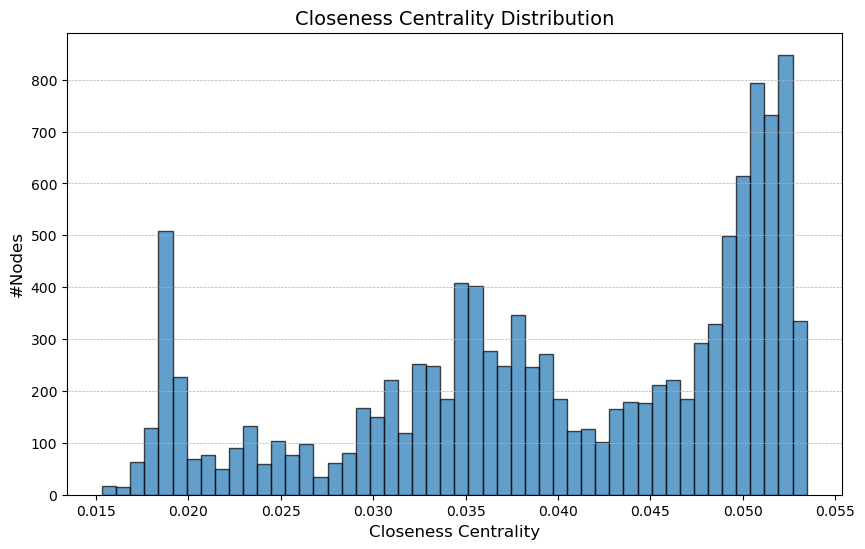

In [9]:
# Estrai i valori della closeness centrality
closeness_values = list(dictCC.values())

# Plot dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(closeness_values, bins=50, alpha=0.7, edgecolor='black')

# Titoli e label
plt.title("Closeness Centrality Distribution", fontsize=14)
plt.xlabel("Closeness Centrality", fontsize=12)
plt.ylabel("#Nodes", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Mostra il grafico
plt.show()

Betweenness Centrality

In [ ]:
# Execution time: 123 min 

N_nodes = G_comp_0.number_of_nodes()

dictBC = nx.betweenness_centrality(G_comp_0)

# Avg betweenness_centrality

sumBC = 0
for nodes in dictBC:
   sumBC = sumBC + dictBC[nodes]
avg_betweenness_centrality = sumBC/N_nodes
print("L'avg betweenness centrality del Giant component è: ", avg_betweenness_centrality)

# Result: 0.0022970289630244818

In [ ]:
outputBC = dict(sorted(dictBC.items(), key=lambda item: item[1], reverse=True))

# Print the first 10 nodes with higher betweenness centrality
print("Top 10 nodi per betweenness centrality:")
for node, value in list(outputBC.items())[:10]:
    print(f"Nodo: {node}, Betweenness Centrality: {value:.5f}")  # Formattazione con 5 decimali

# Print the last 10 nodes with lower betweenness centrality
print("\nUltimi 10 nodi per betweenness centrality:")
for node, value in list(outputBC.items())[-10:]:
    print(f"Nodo: {node}, Betweenness Centrality: {value:.5f}")

Top 10 nodi per betweenness centrality:
Nodo: GRUPPO INTERCOMUNALE DEI VOLONTARI DI PROTEZIONE CIVILE MONTELLO - COSTA DI MEZZATE, Betweenness Centrality: 0.21742
Nodo: AUSER VOLONTARIATO MONTE ANGELI O.D.V. - E.T.S., Betweenness Centrality: 0.21632
Nodo: TONDONASOROSSO ODV, Betweenness Centrality: 0.17036
Nodo: AMICI CASA DEL MANDORLO ODV, Betweenness Centrality: 0.16904
Nodo: ASSOCIAZIONE AMICI DI CRESPI CULTURA APS - ETS, Betweenness Centrality: 0.16861
Nodo: VISIONI D'ARTE ETS, Betweenness Centrality: 0.16509
Nodo: SOGNO SOCIETA' COOPERATIVA SOCIALE - ONLUS, Betweenness Centrality: 0.13610
Nodo: IL CERCHIO DELLA VITA SOCIETA' COOPERATIVA SOCIALE IMPRESA SOCIALE, Betweenness Centrality: 0.11761
Nodo: AAA AURUM ASSISTANCE SOCIETA' COOPERATIVA SOCIALE, Betweenness Centrality: 0.11063
Nodo: PROGETTO GALGO ODV , Betweenness Centrality: 0.10961

Ultimi 10 nodi per betweenness centrality:
Nodo: A.I.D.O. GRUPPO COMUNALE DI POZZUOLO MARTESANA O.D.V., Betweenness Centrality: 0.00000
Nodo: A.

PATH ANALYSIS

In [ ]:
# Diameter of the GC 
diam = nx.diameter(G_comp_0)
diam
# Result: 113

In [ ]:
# Avg shortest path of the GC
nx.average_shortest_path_length(G_comp_0)
# Result: 27.519199378117563

COMPARISON WITH ER AND BA GRAPHS

In [31]:
# Function to get all centralities at once
 
def get_centralities(G):
    N_nodes = G.number_of_nodes()
    dictDC = nx.degree_centrality(G)
    dictCC = nx.closeness_centrality(G)
    dictBC = nx.betweenness_centrality(G)

    sumDC = 0
    sumCC = 0
    sumBC = 0
    for nodes in dictDC:
        sumDC = sumDC + dictDC[nodes]
        sumCC = sumCC + dictCC[nodes]
        sumBC = sumBC + dictBC[nodes]
    Average_degree_centrality = sumDC/N_nodes
    Average_closeness_centrality = sumCC/N_nodes
    Average_betweenness_centrality = sumBC/N_nodes

    print("Avg degree centrality: ", Average_degree_centrality)
    print("Avg closeness centrality: ", Average_closeness_centrality)
    print("Avg betweenness centrality: ", Average_betweenness_centrality)

In [19]:
# Stats of the GC for the comparison
print(G_comp_0.number_of_nodes(), # #Nodes
    G_comp_0.number_of_edges(), # #Edges
    "Avg node degree: ", sum(dict(G_comp_0.degree()).values())/float(len(G_comp_0)), # Avg node degree
    "Avg degree centrality: 0.0136", 
    "Avg closeness centrality: 0.0401158746370474", 
    "Avg betweenness centrality: 0.0022970289630244818", 
    sep="\n")

11547
906232
Avg node degree: 
156.96405992898588
Avg degree centrality: 0.0136
Avg closeness centrality: 0.0401158746370474
Avg betweenness centrality: 0.0022970289630244818


ER Graph <br>
- number of nodes (n)
- probability (p)


ER comparison with the entire graph G

In [ ]:
n1 = G.number_of_nodes() # Number of nodes
l1 = G.number_of_edges() 
p1 = 2*l1/(n1*(n1-1)) # Probability to connect
print("P1 è: ", p1)

P1 è:  0.007006726500949151


In [ ]:
er1 = nx.erdos_renyi_graph(n1, p1)

# Characterization of the ER model 
print("Number of nodes: ", er1.number_of_nodes())
print("Number of edges: ", er1.number_of_edges())
print("Avg node degree: ", sum(dict(er1.degree()).values())/float(len(er1)))


Number of nodes:  16828
Number of edges:  991359
Avg node degree:  117.8225576420252


In [ ]:
get_centralities(er1)

Avg degree centrality:  0.007001994273609487
Avg closeness centrality:  0.4119076938630898
Avg betweenness centrality:  8.488104521184241e-05


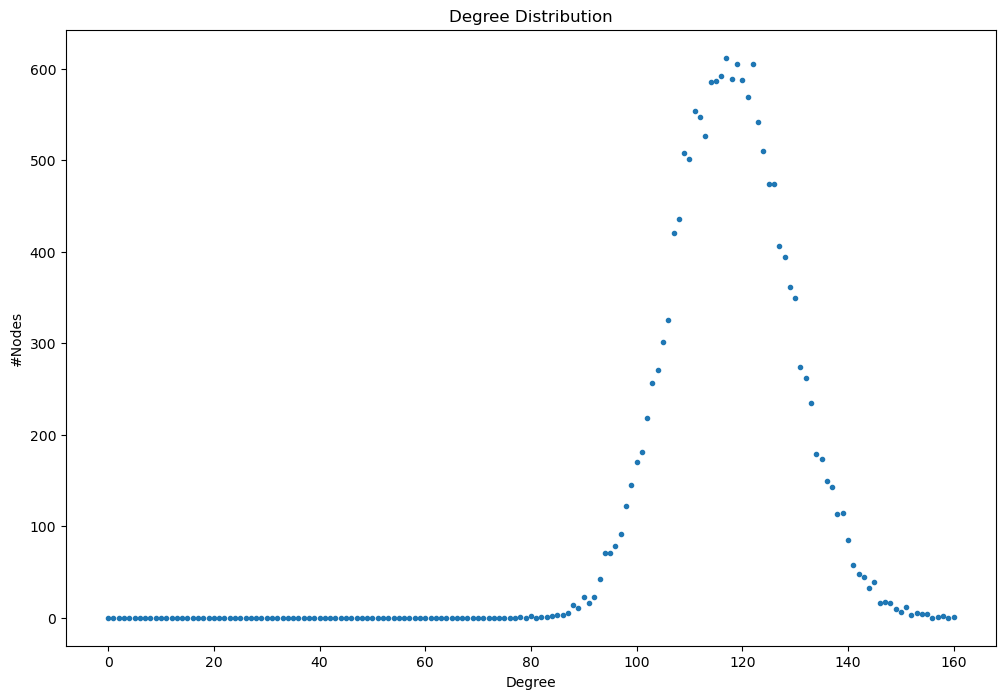

In [ ]:
hist = nx.degree_histogram(er1)
    
plt.figure(figsize=(12, 8)) 
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

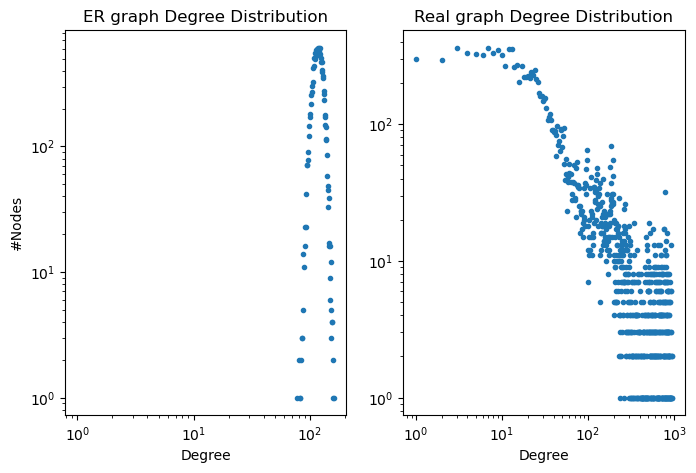

In [ ]:
plt.figure(figsize=(8, 5))

#ER
hist_ER = nx.degree_histogram(er1)
plt.subplot(1, 2, 1)   
plt.plot(range(0, len(hist_ER)), hist_ER, ".")
plt.title("ER graph Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

#Real
hist = nx.degree_histogram(G)
    
plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Real graph Degree Distribution")
plt.xlabel("Degree")
plt.loglog()
plt.show()

ER comparison with the GC

In [29]:
n2 = G_comp_0.number_of_nodes() # Number of nodes
l2 = G_comp_0.number_of_edges() 
p2 = 2*l2/(n2*(n2-1)) # Probability to connect
print("P2 è: ", p2)

P2 è:  0.013594670009439275


In [ ]:
# p threshold for the critical regime of the network (p = 1/N)
p_critical = 1/n2
p_supercritical = math.log(n2)/n2
print(p_critical, p_supercritical)
# We have P2> di p_supercritical, meaning that we just have a single giant component

8.660258075690655e-05 0.0008100962104401019


In [30]:
er2 = nx.erdos_renyi_graph(n2, p2)

# Characterization of the ER model
print("Number of nodes: ", er2.number_of_nodes())
print("Number of edges: ", er2.number_of_edges())
print("Avg node degree: ", sum(dict(er2.degree()).values())/float(len(er2)))


Number of nodes:  11547
Number of edges:  906499
Avg node degree:  157.01030570711006


In [ ]:
get_centralities(er2)

Avg degree centrality:  0.013572348055487142
Avg closeness centrality:  0.47533992436502753
Avg betweenness centrality:  9.562361294219235e-05


In [33]:
nx.is_connected(er2)

True

In [34]:
nx.average_clustering(er2)

0.013597894909070318

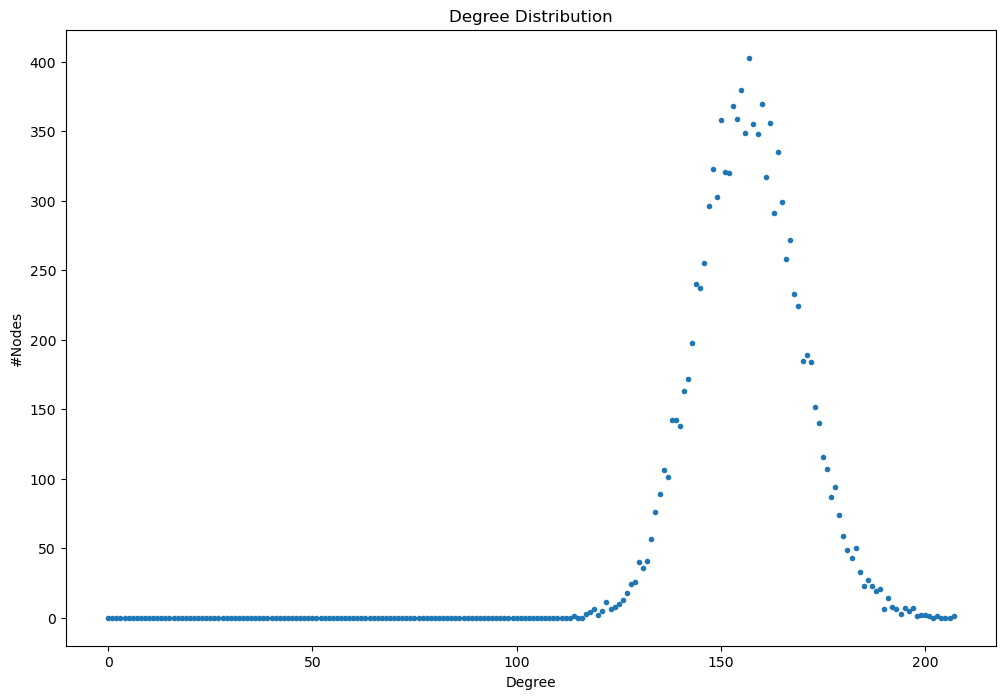

In [ ]:
hist = nx.degree_histogram(er2)

plt.figure(figsize=(12, 8))  
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

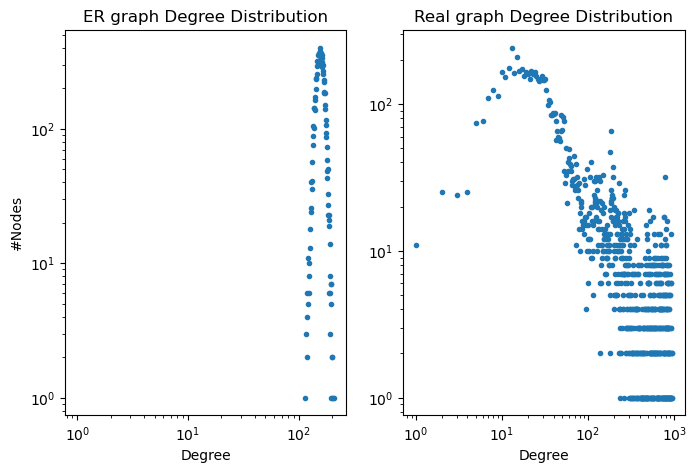

In [ ]:
plt.figure(figsize=(8, 5))

#ER
hist_ER = nx.degree_histogram(er2)
plt.subplot(1, 2, 1)   
plt.plot(range(0, len(hist_ER)), hist_ER, ".")
plt.title("ER graph Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

#Real
hist = nx.degree_histogram(G_comp_0)
    
plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Real graph Degree Distribution")
plt.xlabel("Degree")
plt.loglog()
plt.show()

BA Graph <br>
- Number of nodes (n)
- Number of links each node establishes when added to the network (m)

BA comparison with the entire graph G

In [ ]:
n1 = G.number_of_nodes() # Number of nodes
k1 = sum(dict(G.degree()).values())/float(len(G)) # Avg node degree
m1 = k1/2 # Number of links when a node is added


In [ ]:
print(m1)
print(round(m1))

58.95109341573568
59


In [ ]:
ba1 = nx.barabasi_albert_graph(n1, round(m1)) 

# Characterization of the BA model
print("Number of nodes: ", ba1.number_of_nodes())
print("Number of edges: ", ba1.number_of_edges())
print("Avg node degree: ", sum(dict(ba1.degree()).values())/float(len(ba1)))


Number of nodes:  16828
Number of edges:  989371
Avg node degree:  117.58628476348942


In [ ]:
get_centralities(ba1)
# Execution time: 90 min 

Avg degree centrality:  0.0069879529781595355
Avg closeness centrality:  0.4275776338822395
Avg betweenness centrality:  8.011746158002013e-05


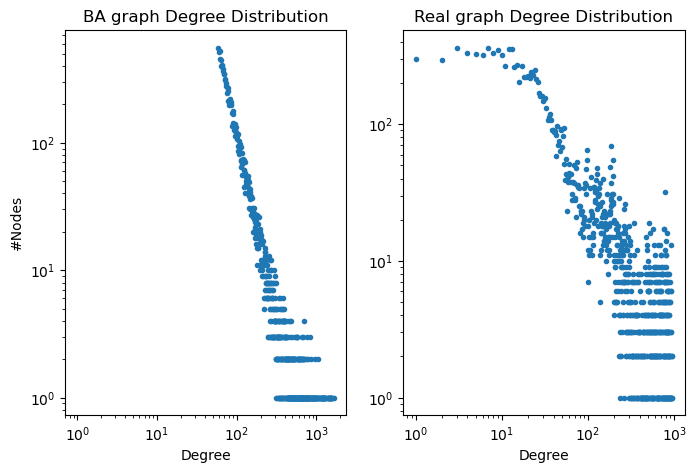

In [ ]:
plt.figure(figsize=(8, 5))

#BA
hist_BA = nx.degree_histogram(ba1)
plt.subplot(1, 2, 1)   
plt.plot(range(0, len(hist_BA)), hist_BA, ".")
plt.title("BA graph Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

#Real
hist = nx.degree_histogram(G)
    
plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Real graph Degree Distribution")
plt.xlabel("Degree")
plt.loglog()
plt.show()

BA comparison with the GC

In [24]:
n2 = G_comp_0.number_of_nodes() # Number of nodes
k2 = sum(dict(G_comp_0.degree()).values())/float(len(G_comp_0)) # Avg node degree
m2 = k2/2 # Number of links when a node is added

In [25]:
print(k2," ", m2," ", round(m2))

156.96405992898588   78.48202996449294   78


In [26]:
ba2 = nx.barabasi_albert_graph(n2, round(m2))

# Characterization of the BA model
print("Number of nodes: ", ba2.number_of_nodes())
print("Number of edges: ", ba2.number_of_edges())
print("Avg node degree: ", sum(dict(ba2.degree()).values())/float(len(ba2)))

Number of nodes:  11547
Number of edges:  894582
Avg node degree:  154.94621979734995


In [ ]:
get_centralities(ba2)

Avg degree centrality:  0.013419904711359194
Avg closeness centrality:  0.47443859027518454
Avg betweenness centrality:  9.623846797617392e-05


In [27]:
nx.is_connected(ba2)

True

In [28]:
nx.average_clustering(ba2)


0.042838924092536514

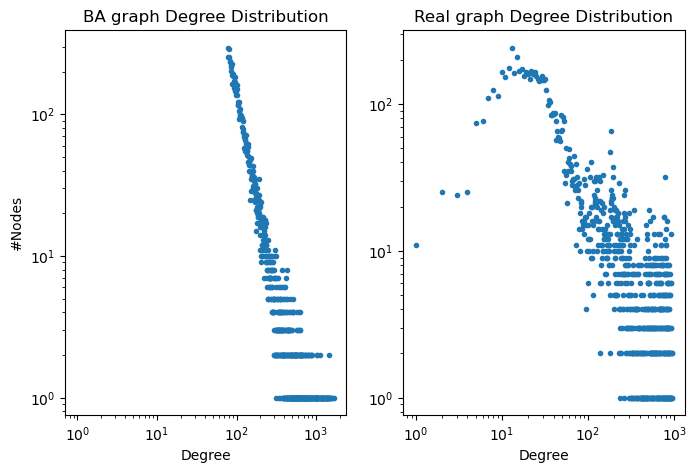

In [ ]:
plt.figure(figsize=(8, 5))

#BA
hist_BA = nx.degree_histogram(ba2)
plt.subplot(1, 2, 1)   
plt.plot(range(0, len(hist_BA)), hist_BA, ".")
plt.title("BA graph Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

#Real
hist = nx.degree_histogram(G_comp_0)
    
plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Real graph Degree Distribution")
plt.xlabel("Degree")
plt.loglog()
plt.show()